<a href="https://colab.research.google.com/github/DERRICKSAMUEL248/Web-Technology/blob/main/Intel_assessment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [16]:
df = pd.read_csv("phone.csv")
df

,Unnamed: 0,Name,Brand,Model,Battery capacity (mAh),Screen size (inches),Touchscreen,Resolution x,Resolution y,Processor,...,Rear camera,Front camera,Operating system,Wi-Fi,Bluetooth,GPS,Number of SIMs,3G,4G/ LTE,Price
0,0,OnePlus 7T Pro McLaren Edition,OnePlus,7T Pro McLaren Edition,4085,6.67,Yes,1440,3120,8,...,48.0,16.0,Android,Yes,Yes,Yes,2,Yes,Yes,58998
1,1,Realme X2 Pro,Realme,X2 Pro,4000,6.50,Yes,1080,2400,8,...,64.0,16.0,Android,Yes,Yes,Yes,2,Yes,Yes,27999
2,2,iPhone 11 Pro Max,Apple,iPhone 11 Pro Max,3969,6.50,Yes,1242,2688,6,...,12.0,12.0,iOS,Yes,Yes,Yes,2,Yes,Yes,106900
3,3,iPhone 11,Apple,iPhone 11,3110,6.10,Yes,828,1792,6,...,12.0,12.0,iOS,Yes,Yes,Yes,2,Yes,Yes,62900
4,4,LG G8X ThinQ,LG,G8X ThinQ,4000,6.40,Yes,1080,2340,8,...,12.0,32.0,Android,Yes,Yes,Yes,1,No,No,49990
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1354,1354,Intex Aqua A2,Intex,Aqua A2,1500,4.00,Yes,480,800,4,...,5.0,0.3,Android,Yes,Yes,Yes,2,Yes,No,2599
1355,1355,Videocon Infinium Z51 Nova+,Videocon,Infinium Z51 Nova+,2000,5.00,Yes,480,854,4,...,8.0,5.0,Android,Yes,Yes,Yes,2,Yes,No,2940
1356,1356,Intex Aqua Y4,Intex,Aqua Y4,1700,4.50,Yes,480,854,2,...,5.0,2.0,Android,Yes,Yes,No,2,Yes,No,2999
1357,1357,iBall Andi4 B20,iBall,Andi4 B20,1250,4.00,Yes,480,800,1,...,2.0,0.3,Android,Yes,Yes,Yes,2,Yes,No,2498


In [17]:
df.head()

,Unnamed: 0,Name,Brand,Model,Battery capacity (mAh),Screen size (inches),Touchscreen,Resolution x,Resolution y,Processor,...,Rear camera,Front camera,Operating system,Wi-Fi,Bluetooth,GPS,Number of SIMs,3G,4G/ LTE,Price
0,0,OnePlus 7T Pro McLaren Edition,OnePlus,7T Pro McLaren Edition,4085,6.67,Yes,1440,3120,8,...,48.0,16.0,Android,Yes,Yes,Yes,2,Yes,Yes,58998
1,1,Realme X2 Pro,Realme,X2 Pro,4000,6.50,Yes,1080,2400,8,...,64.0,16.0,Android,Yes,Yes,Yes,2,Yes,Yes,27999
2,2,iPhone 11 Pro Max,Apple,iPhone 11 Pro Max,3969,6.50,Yes,1242,2688,6,...,12.0,12.0,iOS,Yes,Yes,Yes,2,Yes,Yes,106900
3,3,iPhone 11,Apple,iPhone 11,3110,6.10,Yes,828,1792,6,...,12.0,12.0,iOS,Yes,Yes,Yes,2,Yes,Yes,62900
4,4,LG G8X ThinQ,LG,G8X ThinQ,4000,6.40,Yes,1080,2340,8,...,12.0,32.0,Android,Yes,Yes,Yes,1,No,No,49990


In [18]:
X = df.iloc[:, :].values
X

array([[0, 'OnePlus 7T Pro McLaren Edition', 'OnePlus', ..., 'Yes',
        'Yes', 58998],
       [1, 'Realme X2 Pro', 'Realme', ..., 'Yes', 'Yes', 27999],
       [2, 'iPhone 11 Pro Max', 'Apple', ..., 'Yes', 'Yes', 106900],
       ...,
       [1356, 'Intex Aqua Y4', 'Intex', ..., 'Yes', 'No', 2999],
       [1357, 'iBall Andi4 B20', 'iBall', ..., 'Yes', 'No', 2498],
       [1358, 'iBall Andi Avonte 5', 'iBall', ..., 'Yes', 'No', 3999]],
      dtype=object)

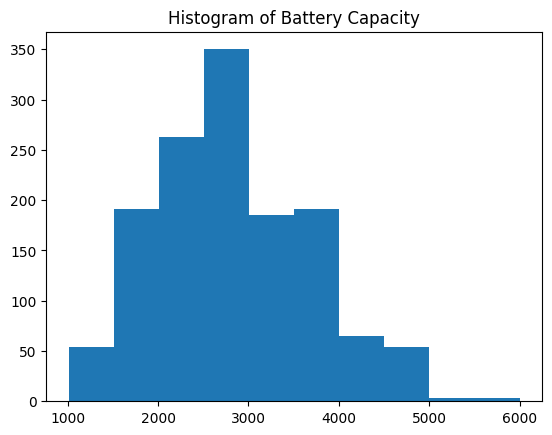

In [19]:
# Histogram of a numerical variable
plt.hist(df['Battery capacity (mAh)'])
plt.title('Histogram of Battery Capacity')
plt.show()

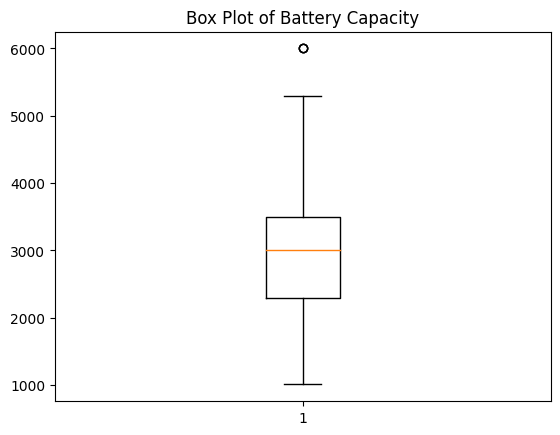

In [20]:
plt.boxplot(df['Battery capacity (mAh)'])
plt.title('Box Plot of Battery Capacity')
plt.show()

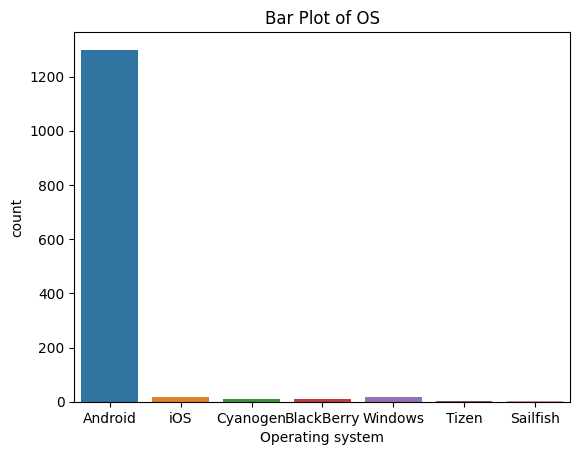

In [21]:
sns.countplot(x='Operating system', data=df)
plt.title('Bar Plot of OS')
plt.show()

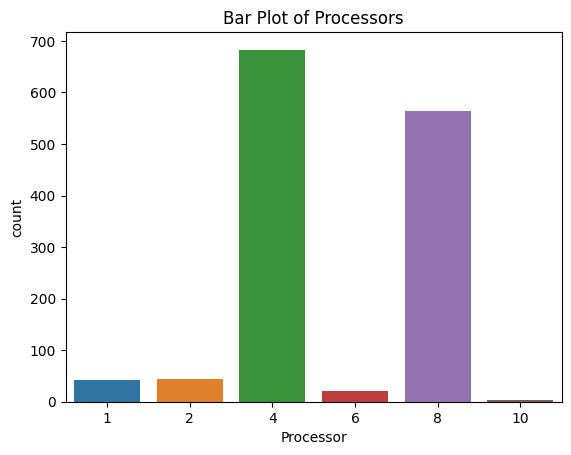

In [23]:
sns.countplot(x='Processor', data=df)
plt.title('Bar Plot of Processors')
plt.show()

In [ ]:
le = LabelEncoder()
df['Name'] = le.fit_transform(df['Name'])
df['Brand'] = le.fit_transform(df['Brand'])
df['Model'] = le.fit_transform(df['Model'])
df['Touchscreen'] = le.fit_transform(df['Touchscreen'])
df['Operating system'] = le.fit_transform(df['Operating system'])
df['Wi-Fi'] = le.fit_transform(df['Wi-Fi'])
df['Bluetooth'] = le.fit_transform(df['Bluetooth'])
df['GPS'] = le.fit_transform(df['GPS'])
df['3G'] = le.fit_transform(df['3G'])
df['4G/ LTE'] = le.fit_transform(df['4G/ LTE'])

In [ ]:
df.describe()

,Unnamed: 0,Name,Brand,Model,Battery capacity (mAh),Screen size (inches),Touchscreen,Resolution x,Resolution y,Processor,...,Rear camera,Front camera,Operating system,Wi-Fi,Bluetooth,GPS,Number of SIMs,3G,4G/ LTE,Price
count,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,...,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000
mean,679.000000,679.000000,37.951435,654.357616,2938.489330,5.291310,0.987491,811.543046,1490.777778,5.551141,...,12.070199,7.037969,0.178072,0.994113,0.988962,0.920530,1.833701,0.893304,0.744665,11465.825607
std,392.453819,392.453819,19.184224,385.272910,873.514133,0.671357,0.111184,270.707271,557.780120,2.196562,...,8.948337,6.295448,0.920598,0.076527,0.104517,0.270571,0.374457,0.308840,0.436210,13857.497077
min,0.000000,0.000000,0.000000,0.000000,1010.000000,2.400000,0.000000,240.000000,320.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,494.000000
25%,339.500000,339.500000,23.000000,319.500000,2300.000000,5.000000,1.000000,720.000000,1280.000000,4.000000,...,8.000000,2.000000,0.000000,1.000000,1.000000,1.000000,2.000000,1.000000,0.000000,4763.500000
50%,679.000000,679.000000,37.000000,656.000000,3000.000000,5.200000,1.000000,720.000000,1280.000000,4.000000,...,12.200000,5.000000,0.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,6999.000000
75%,1018.500000,1018.500000,54.000000,988.500000,3500.000000,5.700000,1.000000,1080.000000,1920.000000,8.000000,...,13.000000,8.000000,0.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,11999.000000
max,1358.000000,1358.000000,75.000000,1320.000000,6000.000000,7.300000,1.000000,2160.000000,3840.000000,10.000000,...,108.000000,48.000000,6.000000,1.000000,1.000000,1.000000,3.000000,1.000000,1.000000,174990.000000


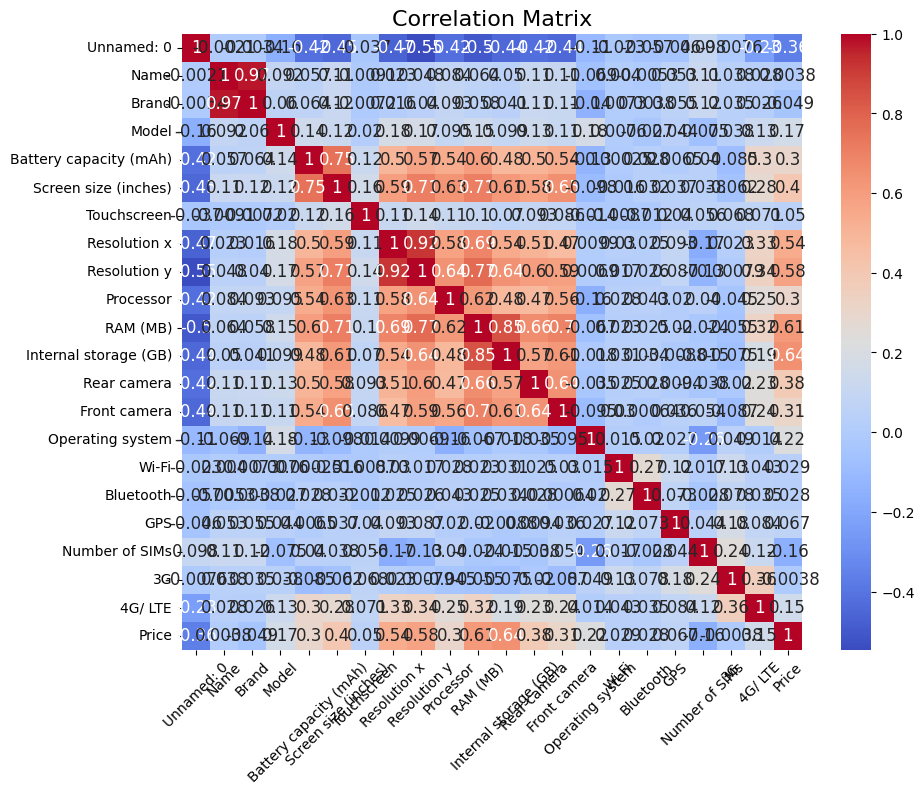

In [ ]:
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', annot_kws={'fontsize': 12})
plt.title('Correlation Matrix', fontsize=16)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()

In [ ]:
df.dtypes

Unnamed: 0                  int64
Name                        int64
Brand                       int64
Model                       int64
Battery capacity (mAh)      int64
Screen size (inches)      float64
Touchscreen                 int64
Resolution x                int64
Resolution y                int64
Processor                   int64
RAM (MB)                    int64
Internal storage (GB)     float64
Rear camera               float64
Front camera              float64
Operating system            int64
Wi-Fi                       int64
Bluetooth                   int64
GPS                         int64
Number of SIMs              int64
3G                          int64
4G/ LTE                     int64
Price                       int64
dtype: object

In [ ]:
df.isnull().sum()

Unnamed: 0                0
Name                      0
Brand                     0
Model                     0
Battery capacity (mAh)    0
Screen size (inches)      0
Touchscreen               0
Resolution x              0
Resolution y              0
Processor                 0
RAM (MB)                  0
Internal storage (GB)     0
Rear camera               0
Front camera              0
Operating system          0
Wi-Fi                     0
Bluetooth                 0
GPS                       0
Number of SIMs            0
3G                        0
4G/ LTE                   0
Price                     0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1359 entries, 0 to 1358
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              1359 non-null   int64  
 1   Name                    1359 non-null   int64  
 2   Brand                   1359 non-null   int64  
 3   Model                   1359 non-null   int64  
 4   Battery capacity (mAh)  1359 non-null   int64  
 5   Screen size (inches)    1359 non-null   float64
 6   Touchscreen             1359 non-null   int64  
 7   Resolution x            1359 non-null   int64  
 8   Resolution y            1359 non-null   int64  
 9   Processor               1359 non-null   int64  
 10  RAM (MB)                1359 non-null   int64  
 11  Internal storage (GB)   1359 non-null   float64
 12  Rear camera             1359 non-null   float64
 13  Front camera            1359 non-null   float64
 14  Operating system        1359 non-null   

In [ ]:
q1 = df['Price'].quantile(0.25)
q2 = df['Price'].quantile(0.50)
q3 = df['Price'].quantile(0.75)
min = df['Price'].min()
max = df['Price'].max()

print("Q1:",q1)
print("Q2:",q2)
print("Q3:",q3)
print("Minimum:",min)
print("Maximum:",max)

Q1: 4763.5
Q2: 6999.0
Q3: 11999.0
Minimum: 494
Maximum: 174990


##Implementation of ML Algorithms

In [ ]:
x = df.drop('Price', axis = 1)
y = df['Price']

In [ ]:
y.unique()

array([ 58998,  27999, 106900,  62900,  49990,  34930,  52990,  79699,
        37999,  23190,  23990,  14999,  19282,  39995,  36990,  13999,
        54280,   9799,  63990,  29999,  31999,  45499,  69999,  59999,
        47990,  56999,   9990,  34999,  18999,   9349,  12000,  26999,
        49999,  36999,  47000,  20999,  53990,  14994,  30000,  26994,
        19999,  16999,  30990,  20246,  22999,  44999,  24999,  39996,
        23999,   6994,  42998,  25990,   5995,   7299,  25999,   3999,
         7999,   6999,  15999,  39999,   8999,  38999,  21150,  10990,
         9999,  26220,  47999,  12999,  15990,  23100,  15377,  16650,
        11999,   8600,  12990,  11845,  16879,   8649,  13690,  35999,
        11990,  22299,  39990,  17973,   9699,   7332,   9499,  25120,
        30999,  18000,  22000,  11900,  11770,  16490,   9580,  14990,
        21299,  59090,  18011,  10299,   8990,  16990,  18990,  18290,
         8849,  15899,  15900,  10499,  28499,   6990,  34990,  12994,
      

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 101)

In [ ]:
print(x_train.shape)
print(x_test.shape)

(1087, 21)
(272, 21)


##Logistic Regression

In [ ]:
lr = LogisticRegression(multi_class = 'multinomial', solver = 'sag',  max_iter = 1000)
lr.fit(x_train, y_train)

y_pred_lr = lr.predict(x_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [ ]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pred_lr)
confusion_matrix

array([[1, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 0, 0]])

In [ ]:
acc_lr = metrics.accuracy_score(y_test, y_pred_lr)
acc_lr

0.03676470588235294

##Linear Regression

In [ ]:
regr = LinearRegression()

regr.fit(x_train, y_train)
print(regr.score(x_test, y_test))

y_pred = regr.predict(x_test)

0.6200450775024067


In [ ]:
mae = mean_absolute_error(y_true=y_test,y_pred=y_pred)
mse = mean_squared_error(y_true=y_test,y_pred=y_pred)
rmse = mean_squared_error(y_true=y_test,y_pred=y_pred,squared=False)

print("MAE:",mae)
print("MSE:",mse)
print("RMSE:",rmse)

MAE: 5645.27431287351
MSE: 105258879.34800114
RMSE: 10259.57500815707


##K- Nearest Neighbor(KNN)

In [ ]:
model_knn = KNeighborsClassifier(n_neighbors=3)
model_knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
y_pred_knn = model_knn.predict(x_test)

In [ ]:
print(metrics.confusion_matrix(y_test, y_pred_knn))

[[0 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [ ]:
print(accuracy_score(y_test, y_pred_knn))

0.014705882352941176
